# Bagging (Random Forest )

Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

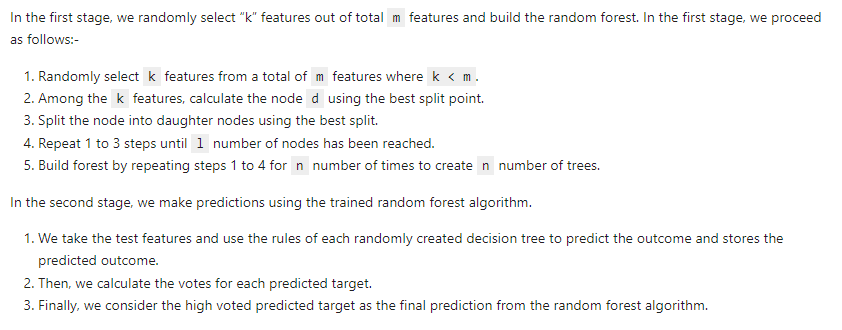

## Advantages

Random forest algorithm can be used to solve both classification and regression problems.

It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.

Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem.

Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.

Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.

## Disadvantages


The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.


The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.

## Feature Selection

Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem.

We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest.

The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.

Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building.

## Problem Statement

The problem is to predict the safety of the car. In this project, I build a Decision Tree Classifier to predict the safety of the car. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the Car Evaluation Data Set for this project, downloaded from the UCI Machine Learning Repository website.

http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for expert system for decision making. The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = '/content/car.data'

df = pd.read_csv(data, header=None)

In [ ]:
# view dimensions of dataset

df.shape

(1728, 7)

In [ ]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [ ]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [ ]:
! pip install --upgrade category_encoders

In [ ]:
# import category encoders

import category_encoders as ce

In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(random_state=12)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

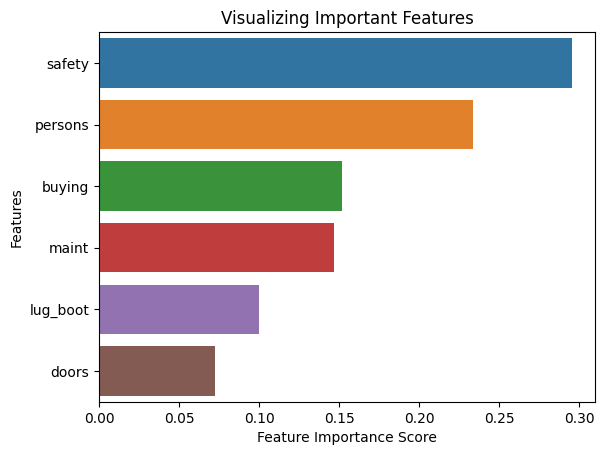

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [ ]:
# declare feature vector and target variable
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571




Q: what is the difference between macro and micro accuracy? In class imbalance, which is ideal?

# Boosting (Adaboost)

AdaBoost, short for Adaptive Boosting, has become one of the most popular “off-the-shelf” algorithms in Data Science.

AdaBoost short for Adaptive Boosting is an ensemble learning used in machine learning for classification and regression problems. The main idea behind AdaBoost is to iteratively train the weak classifier on the training dataset with each successive classifier giving more weightage to the data points that are misclassified.

The final AdaBoost model is decided by combining all the weak classifier that has been used for training with the weightage given to the models according to their accuracies. The weak model which has the highest accuracy is given the highest weightage while the model which has the lowest accuracy is given a lower weightage.

AdaBoost techniques combine many weak machine-learning models to create a powerful classification model for the output. The steps to build and combine these models are as

Step1 – Initialize the weights

For a dataset with N training data points instances, initialize N W_{i} weights for each data point with W_{i} = \frac{1}{N}  
Step2 – Train weak classifiers

Train a weak classifier Mk where k is the current iteration
The weak classifier we are training should have an accuracy greater than 0.5 which means it should be performing better than a naive guess

Step3 – Calculate the error rate and importance of each weak model Mk

Calculate rate error_rate for every weak classifier Mk on the training dataset
Calculate the importance of each model α_k using formula  \alpha_k = \frac{1}{2} \ln{\frac{1 – error_k}{error_k}}


Step4 – Update data point weight for each data point Wi

After applying the weak classifier model to the training data we will update the weight assigned to the points using the accuracy of the model. The formula for updating the weights will be w_i = w_i \exp{(-\alpha_k y_i M_k(x_i))} . Here yi is the true output and Xi is the corresponding input vector


Step5 – Normalize the Instance weight

We will normalize the instance weight so that they can be summed up to 1 using the formula W_i = W_i / sum(W)


Step6 – Repeat steps 2-5 for K iterations

We will train K classifiers and will calculate model importance and update the instance weights using the above formula

The final model M(X) will be an ensemble model which is obtained by combining these weak models weighted by their model weights

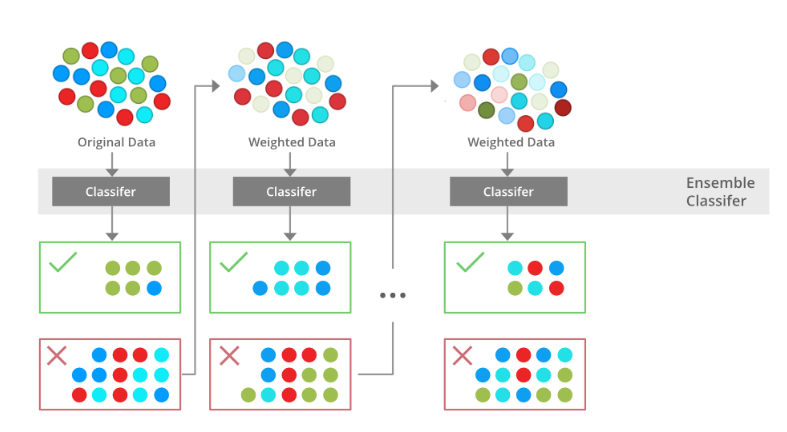

Weak Learners: Unlike random forests, which rely on creating learners that are low bias and high variance, In Adaboost, we make learners with high bias and low variance, and these learners are called decision stumps with a depth of only one. Since it has a depth of only one, it uses a single feature to classify the output, which can lead to multiple errors, and thus, Adaboost combines these weak learners to classify the final output.

Weights: In the case of random forest, we would consider the majority value of all the decision trees during the final output. But, in the case of Adaboost, each learner is assigned a weight that indicates the trust in the learner. The higher the weight, the more it contributes to the final output.

f = α1H1 + α2H2 + α3H3 + …

where α indicates the weights and H represents the weak learners

Dependency: Unlike random forests where each decision tree is independent of others, the decision stumps in AdaBoost depend on the previous stumps to make it better at each stage by transmitting the errors of the previous stump. This enables the classifier to progress towards lower bias.

Algorithm

Step-1 :
Initialize weights. wi = C , i = 1,2,..N

This constant can be anything. I will be using 1/N as my constant. Any constant you pick will give exact same performance given it doesn’t cause overflow.

Step-2:
For m = 1 to M:    
a) Fit classifier Hm with weights w    
b) Compute errₘ = SUM(wi*I(yi!=Hm(xi) ) / SUM(wi)    
c) Compute αₘ = log( (1-errₘ)/errₘ )    
d) Update the weights wi = wi * exp(αₘ*I(yi!=Hm(xi))

Predict:
f(x) = sign( SUM (αₘ*Hm(x)) )

In [ ]:
# Borrowed from here: https://medium.com/@derilraju/implementing-adaboost-classifier-from-scratch-in-python-84e1a8bd2999

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Explanation for this algorithm can be found here (https://medium.com/@derilraju/implementing-adaboost-classifier-from-scratch-in-python-84e1a8bd2999)

class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.threshold = None
        self.feature_idx = None
        self.alpha = None

    def predict(self,X):
        n_samples = X.shape[0]
        X_c = X[:,self.feature_idx]
        preds = np.ones(n_samples)

        if self.polarity ==1:
            preds[X_c < self.threshold] = -1
        else:
            preds[X_c > self.threshold] = -1

        return preds

class myAdaBoost:
    def __init__(self,n_clf=5):
        self.n_clf = n_clf

    def fit(self,X,y):
        n_samples,n_features = X.shape
        w = np.full(n_samples, (1/n_samples))

        self.clfs=[]
        for _ in range(self.n_clf):
            clf = DecisionStump()
            min_error = float('inf')
            for feat in range(n_features):
                X_c = X[:,feat]
                thresholds=np.unique(X_c)
                for threshold in thresholds:
                    p=1
                    preds=np.ones(n_samples)
                    preds[X_c<threshold]=-1

                    misclassified = w[y!=preds]
                    error=sum(misclassified)

                    if error >0.5:
                        p=-1
                        error=1-error

                    if error<min_error:
                        min_error=error
                        clf.threshold=threshold
                        clf.feature_idx=feat
                        clf.polarity=p

            EPS=1e-10
            clf.alpha=0.5*np.log((1.0-min_error+EPS)/(min_error+EPS))
            preds = clf.predict(X)
            w *= np.exp(-clf.alpha*y*preds)
            w/=np.sum(w)
            self.clfs.append(clf)

    def predict(self,X):
        clf_preds = [clf.alpha*clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds,axis=0)
        y_pred = np.sign(y_pred)
        return y_pred

## Method to calculate accuracy
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

## Loading dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
y[y==0]=-1
## Splitting data randomly as train (80% of the data) and test (20% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = myAdaBoost()
## Fitting the model on train data
clf.fit(X_train, y_train)

## Predict the target's for 20% test data
y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)
acc

0.9122807017543859

Immediate task: Use XGBoost!

Let's meet at 09:30 PM and discuss on the classification report.


In [ ]:
# Borrowed from here: https://medium.com/@derilraju/implementing-adaboost-classifier-from-scratch-in-python-84e1a8bd2999

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgb import XGBoost

data = datasets.load_breast_cancer()
X = data.data
y = data.target
y[y==0]=-1
## Splitting data randomly as train (80% of the data) and test (20% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = ## TODO HERE - XGBoost (~94%) | gbc = GradientBoostingClassifier(n_estimators=300) (~95%)
## Fitting the model on train data
clf.fit(X_train, y_train)

## Predict the target's for 20% test data
y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)
acc

# Boosting (Gradient)

Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration, the algorithm computes the gradient of the loss function with respect to the predictions of the current ensemble and then trains a new weak model to minimize this gradient. The predictions of the new model are then added to the ensemble, and the process is repeated until a stopping criterion is met.

In contrast to AdaBoost, the weights of the training instances are not tweaked, instead, each predictor is trained using the residual errors of the predecessor as labels. There is a technique called the Gradient Boosted Trees whose base learner is CART (Classification and Regression Trees). The below diagram explains how gradient-boosted trees are trained for regression problems.

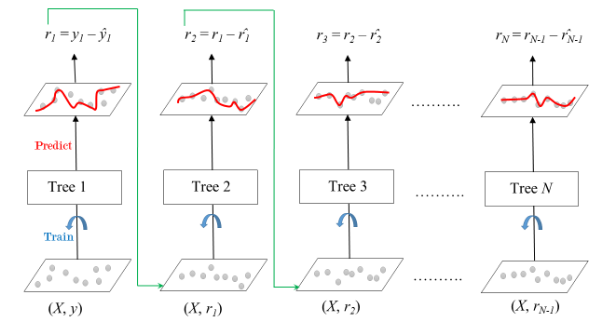

HW: There is an important parameter used in this technique known as Shrinkage. Shrinkage refers to the fact that the prediction of each tree in the ensemble is shrunk after it is multiplied by the learning rate (eta) which ranges between 0 to 1. There is a trade-off between eta and the number of estimators, decreasing learning rate needs to be compensated with increasing estimators in order to reach certain model performance. Since all trees are trained now, predictions can be made. Each tree predicts a label and the final prediction is given by the formula,

y(pred) = y1 + (eta *  r1) + (eta * r2) + ....... + (eta * rN)

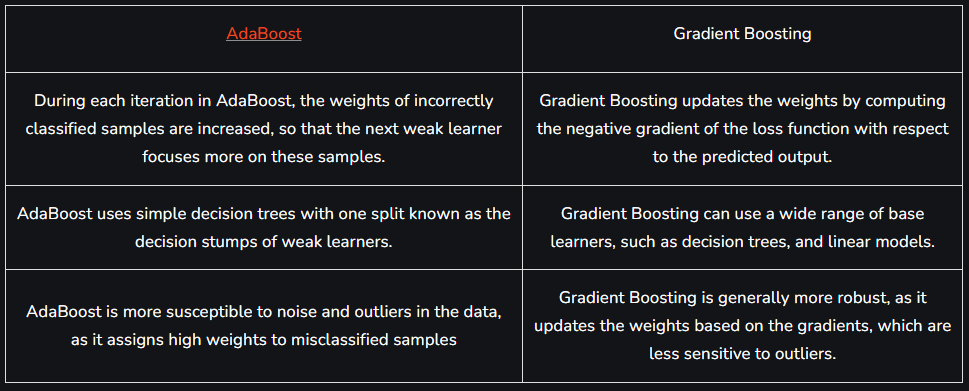

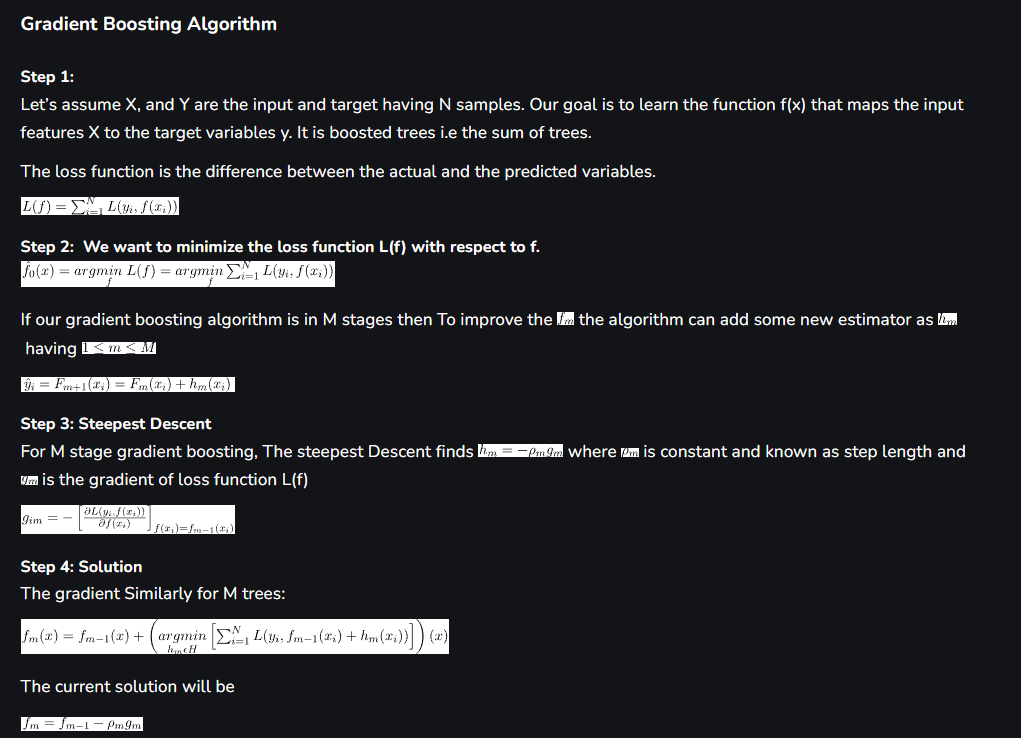

Source: [Gradient boosting, gfg](https://www.geeksforgeeks.org/ml-gradient-boosting/), [from scratch](https://python-course.eu/machine-learning/boosting-algorithm-in-python.php)

In [ ]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# Setting SEED for reproducibility
SEED = 23

# Importing the dataset
X, y = load_digits(return_X_y=True)

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y,
													test_size = 0.25,
													random_state = SEED)

# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
								learning_rate=0.05,
								random_state=100,
								max_features=5 )
# Fit to training set
gbc.fit(train_X, train_y)

# Predict on test set
pred_y = gbc.predict(test_X)

# accuracy
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))


Gradient Boosting Classifier accuracy is : 0.98


In [ ]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Setting SEED for reproducibility
SEED = 23

# Importing the dataset
X, y = load_diabetes(return_X_y=True)

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y,
													test_size = 0.25,
													random_state = SEED)

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='absolute_error',
								learning_rate=0.1,
								n_estimators=300,
								max_depth = 1,
								random_state = SEED,
								max_features = 5)

# Fit to training set
gbr.fit(train_X, train_y)

# Predict on test set
pred_y = gbr.predict(test_X)

# test set RMSE
test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))


Root mean Square error: 56.39


# Stacked Generalization
Stacked Generalization or “Stacking” for short is an ensemble machine learning algorithm.

It involves combining the predictions from multiple machine learning models on the same dataset, like bagging and boosting.

Stacking addresses the question:

* Given multiple machine learning models that are skillful on a problem, but in different ways, how do you choose which model to use (trust)?

The approach to this question is to use another machine learning model that learns when to use or trust each model in the ensemble.

* Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).
* Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.823 (0.044)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


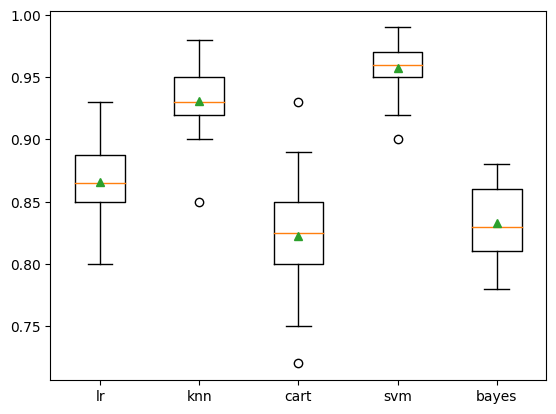

In [ ]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
 return X, y

# get a list of models to evaluate
def get_models():
 models = dict()
 models['lr'] = LogisticRegression()
 models['knn'] = KNeighborsClassifier()
 models['cart'] = DecisionTreeClassifier()
 models['svm'] = SVC()
 models['bayes'] = GaussianNB()
 return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.827 (0.042)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.963 (0.020)


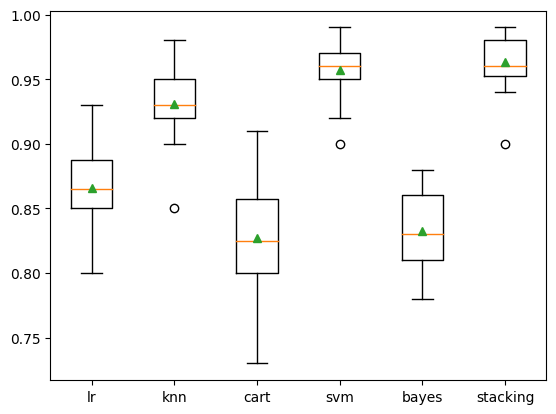

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
 return X, y

# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('lr', LogisticRegression()))
 level0.append(('knn', KNeighborsClassifier()))
 level0.append(('cart', DecisionTreeClassifier()))
 level0.append(('svm', SVC()))
 level0.append(('bayes', GaussianNB()))
 # define meta learner model
 level1 = LogisticRegression()
 # define the stacking ensemble
 model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
 return model

# get a list of models to evaluate
def get_models():
 models = dict()
 models['lr'] = LogisticRegression()
 models['knn'] = KNeighborsClassifier()
 models['cart'] = DecisionTreeClassifier()
 models['svm'] = SVC()
 models['bayes'] = GaussianNB()
 models['stacking'] = get_stacking()
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Source: [Stacking, Machine Learning Mastery](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)